In [9]:
ls ../dnftresult

DoubleDat_CNN_baseline_images/
DoubleDat_Plambda_image_RotMaskFeat1Reslayer_baseline_images/
DoubleDat_Plambda_image_RotMaskFeat1layer_Expcosine_baseline_images/
DoubleDat_Plambda_image_RotMaskFeat1layer_baseline_images/
DoubleDat_Plambda_image_RotMaskFeat2Reslayer_baseline_images/
DoubleDat_Plambda_image_RotMaskFeat2layer_baseline_images/
DoubleDat_Plambda_image_RotMaskFeat2layer_ver2_baseline_images/
DoubleDat_Plambda_image_RotMaskFeat2layer_ver3_baseline_images/
DoubleDat_Plambda_image_RotMaskFeatCNN1layer_Expcosine_baseline_images/
DoubleDat_Plambda_image_RotMaskFeatCNN1layer_baseline_images/
OneDCyclic_fordebug_baseline/
OneDCyclic_mlp1layer_nonDim_baseline/
OneDsignal_OddEvenTwo_ForOwnDecoder_trial_baseline/
OneDsignal_OddEvenTwo_OneLayer_lasso_baseline/
OneDsignal_OddEvenTwo_Trial_OwnDecoderTwo_baseline/
OneDsignal_OddEvenTwo_Trial_OwnDecoder_baseline/
OneDsignal_OddEvenTwo_Trial_OwnDecoder_sparse_baseline/
OneDsignal_OddEvenTwo_Trial_OwnDecoder_sparse_two_baseline/
OneDsignal_O

./dataset/oneDsignal_data.py
[0, 8, 12, 16, 32, 48]
0
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!


100%|██████████| 49/49 [00:03<00:00, 14.17it/s]


HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!


100%|██████████| 49/49 [00:03<00:00, 14.09it/s]


HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!
HOGE!!!!!


100%|██████████| 49/49 [00:03<00:00, 14.14it/s]


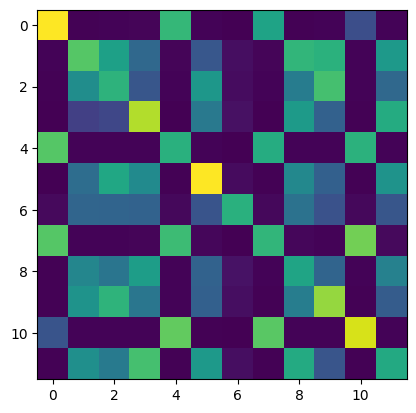

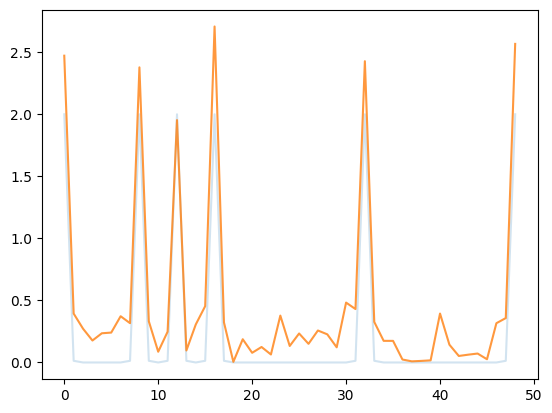

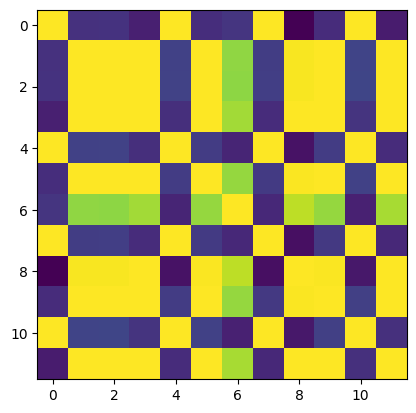

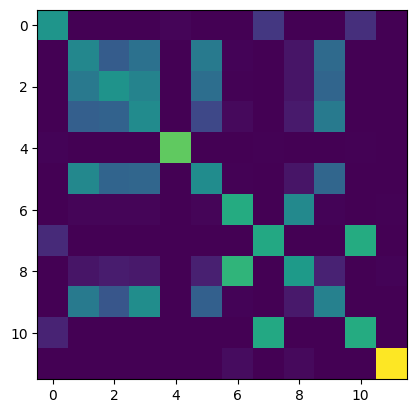

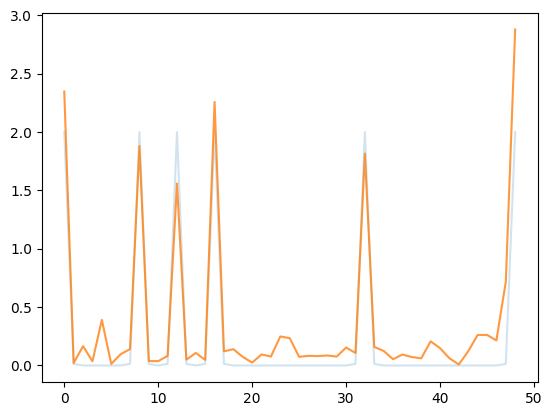

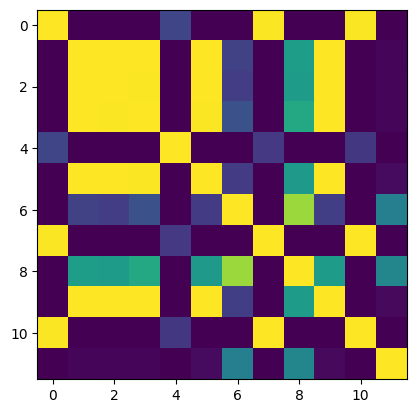

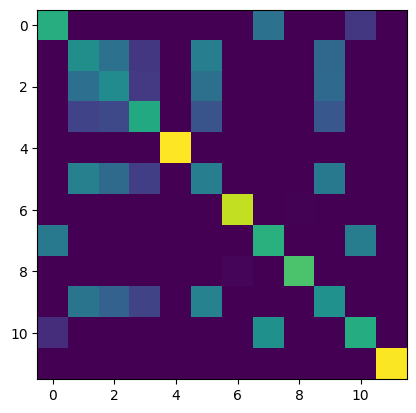

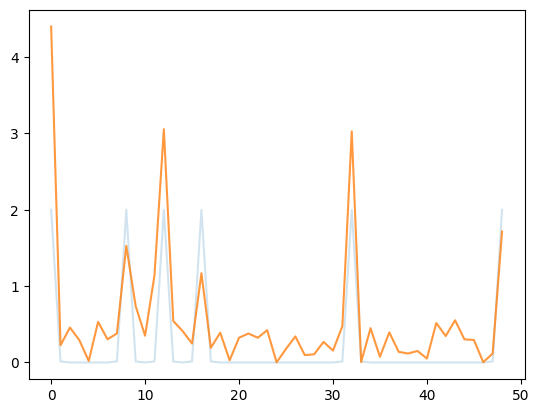

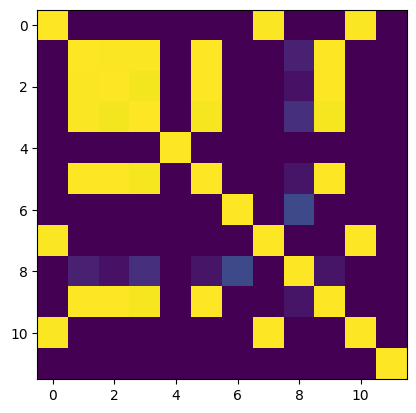

In [17]:
import sys
import yaml

sys.path.append("../")
import os
import torch
from misc import yaml_util as yu
import numpy as np

sys.path.append("../dataset")
sys.path.append("../module")
sys.path.append("../misc")

from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from misc import character_analysis as ca
from misc import loss_helper as lh
import pdb
import copy
from module import ft_decimation as ftd

import time


# datname = "OneDsignal_c8mimic_lowpow"

datname = "OneDsignal_highlow8m"
modelname = "Plambda_OneD_RotMaskFeat3layer_thruDec_cosine"
trainname = "faster"


# datname = "OneDsignal_highlow8m"
# modelname = "Plambda_OneD_RotMaskFeat2layer_debug"
# trainname = "long_hor"


with open(f"""../cfg_data/{datname}.yaml""", "rb") as f:
    cfg_data = yaml.safe_load(f)

cfg_data["args"]["shift_label"] = True
mydata = yu.load_component(cfg_data)

expname = f"""{datname}_{modelname}_{trainname}"""

exppath = os.path.join("../dnftresult", expname)

mymodelpath = f"""{exppath}/model.pt"""
mymodel = torch.load(mymodelpath)


myloader = DataLoader(
    mydata,
    batch_size=32,
    shuffle=True,
    num_workers=2,
)


Ms = {} 
DMs = {} 
OMs = {}  
for k in range(mymodel.depth): 
    Ms[k]= []
    DMs[k] = None
    OMs[k] = None

for to_take_a_look in Ms.keys():
    
    if hasattr(mymodel, "nftlayers"):
        mynft = mymodel.nftlayers[to_take_a_look]
    else:
        mynft = mymodel


    shifts = []
    DMs[to_take_a_look] = mynft.PLambdaNet.dynamics_mask
    OMs[to_take_a_look] = mynft.PLambdaNet.own_mask


    
    if hasattr(mydata, "nfreq"):
        for k in range(20):
            evalseq, shift = next(iter(myloader))
            evalseq = evalseq[:, :2].to(mynft.encoder.device)
            predicted = mymodel(evalseq, n_rolls=1)
            shifts.append(shift)
            Ms[to_take_a_look].append(mynft.dynamics.M)
    
        shifts = torch.concatenate(shifts)
        Ms[to_take_a_look] = torch.concatenate(Ms[to_take_a_look]).detach()
    
        plt.figure()
    
        matrixMeanshape = torch.mean(torch.abs(Ms[to_take_a_look].detach()).to("cpu"), axis=0)
    
        plt.imshow(matrixMeanshape)
    
        myfreqs = np.array(mydata.freqsel)
        maxfreq = np.max(myfreqs)
    
        targfreq, prods0 = ca.inner_prod(
            Ms[to_take_a_look].to(shifts.device), shifts, maxfreq=maxfreq, bins=maxfreq + 1
        )
    
        plt.figure()
        deltas = ca.deltafxn(targfreq, mydata.freqsel) * 2
        plt.plot(
            targfreq,
            deltas,
            alpha=0.2,
            label="gt:" + str(np.where(deltas > 1.0)[0]),
        )
        targfreq, prods0 = ca.inner_prod(
            Ms[to_take_a_look].to(shifts.device), shifts, maxfreq=maxfreq, bins=maxfreq + 1
        )
        plt.plot(
            targfreq,
            prods0,
            label="pred0:" + str(np.where(prods0 > 1.0)[0]),
            alpha=0.8,
        )

        plt.figure()
        plt.imshow(DMs[to_take_a_look].detach().to('cpu')) 
    


In [18]:
import torch

# Function to find connected components based on non-zero entries
def find_connected_components(matrix, threshold = 0.1):
    n = matrix.size(0)
    visited = [False] * n
    components = []
    
    
    def dfs(i, component):
        visited[i] = True
        component.append(i)
        for j in range(n):
            if torch.abs(matrix[i, j]) > threshold or torch.abs(matrix[j, i]) >  threshold:  # Check for non-zero connections
                if not visited[j]:
                    dfs(j, component)

    for i in range(n):
        if not visited[i]:
            component = []
            dfs(i, component)
            components.append(component)

    return components

# def extractor(matrix, idx): 
#     filtered = torch.zeros_like(matrix)
#     filtered[idx][:, idx] = matrix[idx][:, idx]
    
#     return filtered

def extractor(matrix, idx): 
    # Create a zero matrix of the same size
    filtered = torch.zeros_like(matrix)
    
    # Use advanced indexing to assign the submatrix from matrix to filtered
    for i in range(len(idx)):
        for j in range(len(idx)):
            filtered[idx[i], idx[j]] = matrix[idx[i], idx[j]]
    
    return filtered

def batch_extractor(matrices, idx): 
    filtered = torch.zeros_like(matrices)
    for j in range(len(matrices)):
        filtered[j] = extractor(matrices[j], idx)
    return filtered

In [19]:
DMcomponents = [None]* mymodel.depth
MsMean = [None]* mymodel.depth 
Mscomponents = [None]* mymodel.depth 

threshold = 0.3
for k in range(mymodel.depth):
    DMcomponents[k] =  find_connected_components(DMs[k], threshold=threshold) 
    MsMean[k] = torch.mean(torch.abs(Ms[k]), dim=0).detach().to('cpu')
    Mscomponents[k] = find_connected_components(MsMean[k], threshold=threshold)

for k in range(mymodel.depth): 
    print(f""" DMcomponents{k} : \t  {DMcomponents[k]} """) 

print('\n' * 1) 
for k in range(mymodel.depth):     
    print(f""" Mscomponents{k} : \t  {Mscomponents[k]} """) 

 DMcomponents0 : 	  [[0, 4, 1, 2, 3, 5, 6, 8, 9, 10, 7, 11]] 
 DMcomponents1 : 	  [[0, 7, 10], [1, 2, 3, 5, 8, 6, 11, 9], [4]] 
 DMcomponents2 : 	  [[0, 7, 10], [1, 2, 3, 5, 9], [4], [6], [8], [11]] 


 Mscomponents0 : 	  [[0, 4, 7, 10], [1, 2, 5, 11, 3, 8, 9], [6]] 
 Mscomponents1 : 	  [[0], [1, 2, 3, 5, 9], [4], [6, 8], [7, 10], [11]] 
 Mscomponents2 : 	  [[0, 7, 10], [1, 2, 5, 9], [3], [4], [6], [8], [11]] 


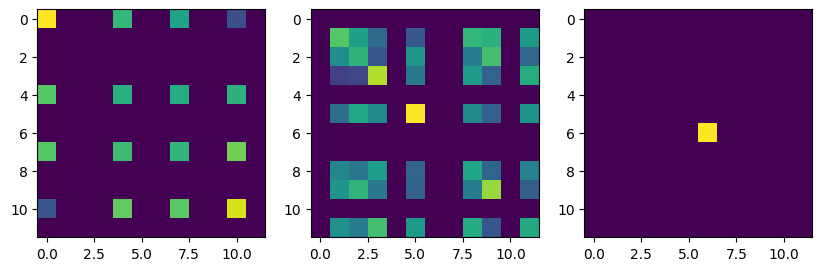

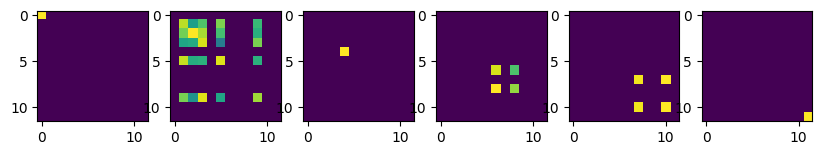

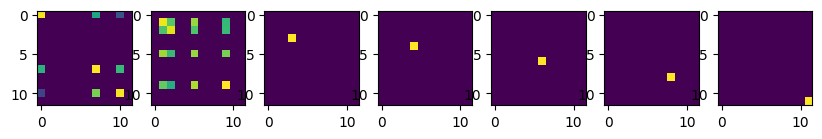

In [20]:
blocks = {} 


for j in range(len(Ms)): 
    blocks[j] = {} 
    plt.figure(figsize = (10, 10))
    for k in range(len(Mscomponents[j])):
        plt.subplot(1, len(Mscomponents[j]), k+1) 
        plt.imshow(extractor(MsMean[j],Mscomponents[j][k]))
        blocks[j][k] = batch_extractor(Ms[j], Mscomponents[j][k]) 


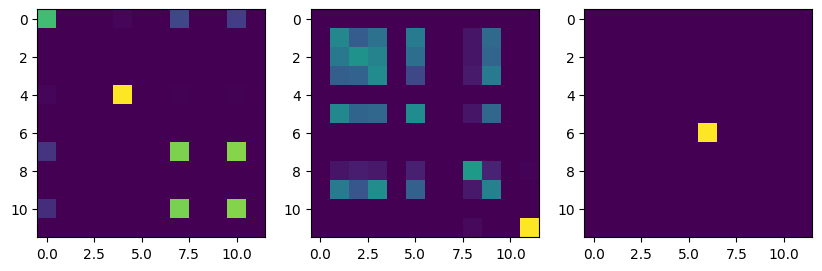

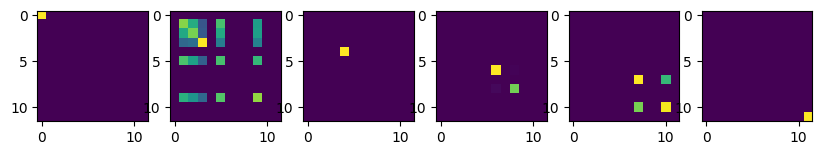

In [21]:
blocks_in_terms_of_prev = {} 

for j in range(1, len(Ms)): 
    blocks_in_terms_of_prev[j] = {} 
    plt.figure(figsize = (10, 10))
    for k in range(len(Mscomponents[j-1])):
        plt.subplot(1, len(Mscomponents[j-1]), k+1) 
        plt.imshow(extractor(MsMean[j],Mscomponents[j-1][k]))
        blocks_in_terms_of_prev[j][k] = batch_extractor(Ms[j], Mscomponents[j-1][k]) 

100%|██████████| 49/49 [00:03<00:00, 14.14it/s]


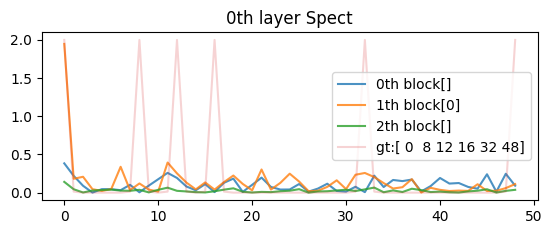

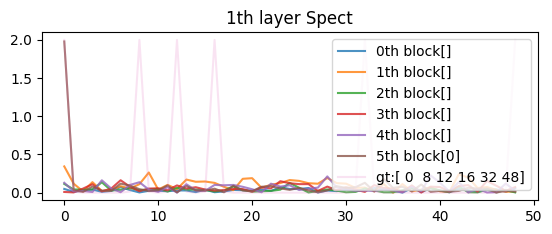

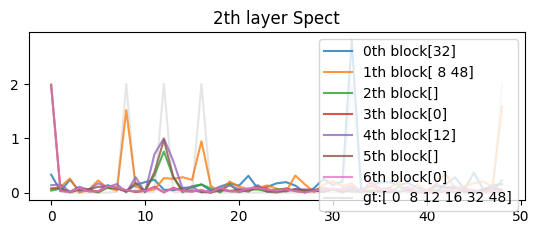

In [22]:
#これちょっと信じられない。０と１、足してちゃんと全体を復元できる感全くない。

for j in range(mymodel.depth):
    plt.figure()
    for k in range(len(blocks[j])): 
        targfreq, prods0 = ca.inner_prod(
            blocks[j][k].to(shifts.device), shifts, maxfreq=maxfreq, bins=maxfreq + 1
        )
        plt.subplot(2, 1, 1) 
        plt.plot(
            targfreq,
            prods0,
            label=f"""{k}th block"""  + str(np.where(prods0 > 1.0)[0]),
            alpha=0.8,
        )
    plt.plot(
        targfreq,
        deltas,
        alpha=0.2,
        label="gt:" + str(np.where(deltas > 1.0)[0]),
    )    
    plt.legend() 
    plt.title(f"""{j}th layer Spect""")

100%|██████████| 49/49 [00:03<00:00, 13.71it/s]


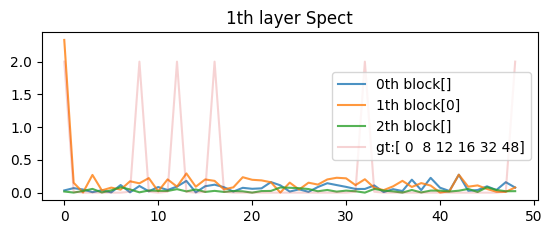

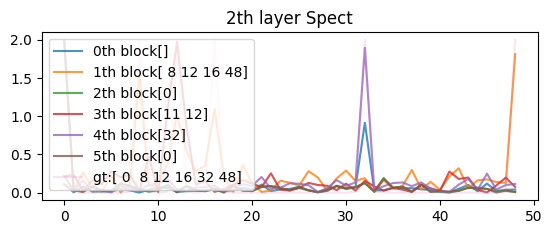

In [23]:
for j in range(1, mymodel.depth):
    plt.figure()
    for k in range(len(blocks_in_terms_of_prev[j])): 
        targfreq, prods0 = ca.inner_prod(
            blocks_in_terms_of_prev[j][k].to(shifts.device), shifts, maxfreq=maxfreq, bins=maxfreq + 1
        )
        plt.subplot(2, 1, 1) 
        plt.plot(
            targfreq,
            prods0,
            label=f"""{k}th block"""  + str(np.where(prods0 > 1.0)[0]),
            alpha=0.8,
        )
    plt.plot(
        targfreq,
        deltas,
        alpha=0.2,
        label="gt:" + str(np.where(deltas > 1.0)[0]),
    )    
    plt.legend() 
    plt.title(f"""{j}th layer Spect""")